## TEPI DAN GARIS

In [18]:
# mengimpor pustaka OpenCV (Open Source Computer Vision Library)
import cv2 
# mengimpor pustaka NumPy dan memberinya alias np
import numpy as np 
# mengimpor modul pyplot dari pustaka Matplotlib dan memberinya alias plt
import matplotlib.pyplot as plt 
# magic command yang digunakan dalam notebook Jupyter
%matplotlib inline 

# mengimpor pustaka scikit-image
import skimage 

In [19]:
# Membaca gambar "1.jpg" menggunakan OpenCV
image = cv2.imread("1.jpg")

In [20]:
# Menampilkan gambar dengan judul "gambar pakir"
cv2.imshow("gambar pakir",image)

# Menunggu input dari keyboard. '0' berarti menunggu selamanya sampai tombol ditekan
cv2.waitKey(0)

# Menutup semua jendela OpenCV yang dibuka
cv2.destroyAllWindows()

In [21]:
# Mengonversi gambar dari format BGR ke grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Mengaplikasikan Canny Edge Detection dengan nilai threshold 100 dan 150
edges = cv2.Canny(image,100,150)

In [22]:
# Menampilkan gambar dengan judul "gambar parkir"
cv2.imshow("gambar parkir",edges)

# Menunggu input dari keyboard. '0' berarti menunggu selamanya sampai tombol ditekan
cv2.waitKey(0)

# Menutup semua jendela OpenCV yang dibuka
cv2.destroyAllWindows()

Text(0.5, 1.0, 'gambar setelah diolah')

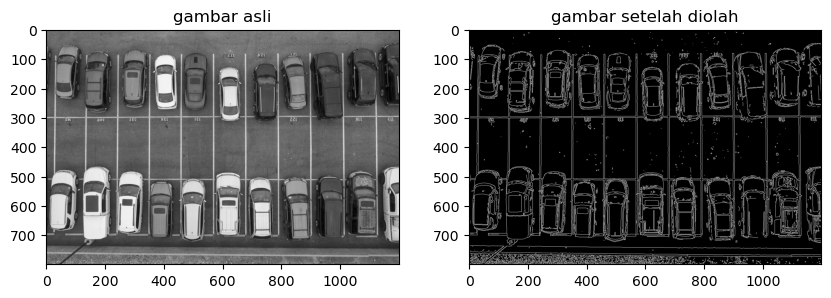

In [23]:
# Membuat sebuah figure dengan dua subplot yang diatur dalam 1 baris dan 2 kolom, dengan ukuran total figure 10x10 inci
fig, axs = plt.subplots(1,2,figsize = (10,10))

# Meratakan array dari subplot sehingga dapat diindeks sebagai array 1D
ax = axs.ravel()

# Menampilkan gambar grayscale 'gray' di subplot pertama menggunakan colormap grayscale
ax[0].imshow(gray,cmap = "gray")

# Mengatur judul untuk subplot pertama menjadi "gambar asli"
ax[0].set_title("gambar asli")

# Menampilkan gambar yang telah diproses 'edges' di subplot kedua menggunakan colormap grayscale
ax[1].imshow(edges,cmap = "gray")

# Mengatur judul untuk subplot kedua menjadi "gambar setelah diolah"
ax[1].set_title("gambar setelah diolah")

In [24]:
## Mendeteksi garis pada gambar menggunakan algoritma Probabilistic Hough Line Transform
lines = cv2.HoughLinesP(edges,1,np.pi/180,30,maxLineGap=20)

## Mengaplikasikan Probabilistic Hough Line Transform
## Argumen pertama adalah gambar hasil deteksi tepi (edges)
## Argumen kedua adalah resolusi rho dalam piksel (1 piksel)
## Argumen ketiga adalah resolusi theta dalam radian (np.pi/180, berarti 1 derajat)
## Argumen keempat adalah threshold (30), jumlah minimal titik yang diperlukan untuk mendeteksi sebuah garis
## Argumen kelima adalah maxLineGap (20), jarak maksimum antara dua segmen garis untuk menganggapnya sebagai satu garis yang sama

## Membuat salinan dari gambar asli untuk menggambar garis yang terdeteksi
image_line = image.copy()

In [25]:
# Mengiterasi setiap baris dalam variabel 'lines'
for line in lines:
    
    # Mendapatkan koordinat x1, y1, x2, y2 dari elemen pertama pada baris 'line'
    x1,y1,x2,y2 = line[0]
    
    # Menggambar garis pada gambar 'image_line' dari titik (x1, y1) ke titik (x2, y2)
    # dengan warna (100, 8, 255) dan ketebalan garis 1 piksel
    cv2.line(image_line,(x1,y1),(x2,y2),(100,8,255),1)

Text(0.5, 1.0, 'gambar setelah diolah')

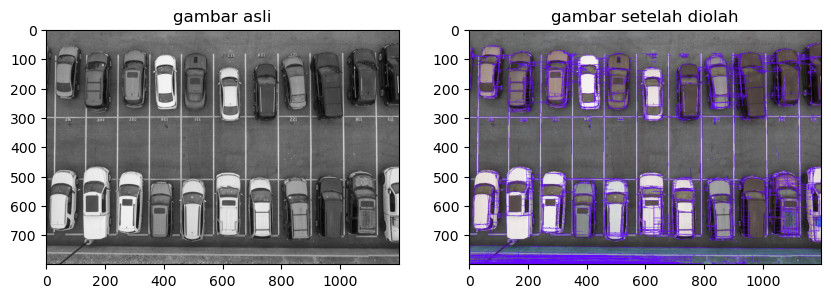

In [12]:
# Membuat sebuah figure dengan dua subplot yang diatur dalam 1 baris dan 2 kolom, dengan ukuran total figure 10x10 inci
fig, axs = plt.subplots(1,2,figsize = (10,10))
# Meratakan array dari subplot sehingga dapat diindeks sebagai array 1D
ax = axs.ravel()

# Menampilkan gambar grayscale 'gray' di subplot pertama menggunakan colormap grayscale
ax[0].imshow(gray,cmap = "gray")
# Mengatur judul untuk subplot pertama menjadi "gambar asli"
ax[0].set_title("gambar asli")

# Menampilkan gambar yang telah diproses 'image_line' di subplot kedua menggunakan colormap grayscale
ax[1].imshow(image_line,cmap = "gray")
# Mengatur judul untuk subplot kedua menjadi "gambar setelah diolah"
ax[1].set_title("gambar setelah diolah")

## EKSTRAKSI FITUR

In [26]:
# Mengimpor modul OpenCV untuk pengolahan citra
import cv2
# Mengimpor modul matplotlib untuk plotting
import matplotlib.pyplot as plt
# Mengimpor modul numpy untuk operasi array
import numpy as np
# Mengimpor modul skimage untuk pengolahan citra
import skimage

# Mengimpor fungsi graycomatrix dan graycoprops dari skimage.feature untuk menghitung matriks co-occurrence dan properti tekstur
from skimage.feature import graycomatrix,graycoprops

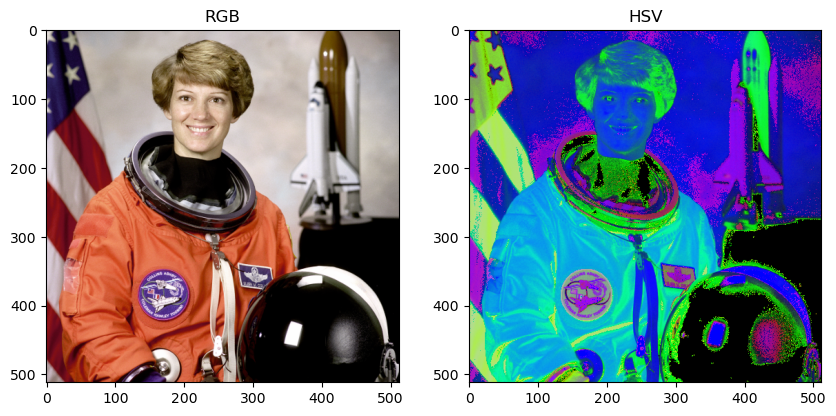

In [27]:
# Mengambil gambar 'astronaut' dari skimage
img = skimage.data.astronaut()
# Mengkonversi gambar dari ruang warna RGB ke HSV menggunakan OpenCV
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


# Tampilkan gambar RGB dan HSV
# Membuat sebuah figure dengan dua subplot yang diatur dalam 1 baris dan 2 kolom, dengan ukuran total figure 10x10 inci
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Meratakan array dari subplot sehingga dapat diindeks sebagai array 1D
ax = axs.ravel()

# Menampilkan gambar asli dalam format RGB di subplot pertama
ax[0].imshow(img)
# Mengatur judul untuk subplot pertama menjadi "RGB"
ax[0].set_title("RGB")

# Menampilkan gambar yang telah dikonversi ke format HSV di subplot kedua dengan colormap 'hsv'
ax[1].imshow(img_hsv, cmap="hsv")
# Mengatur judul untuk subplot kedua menjadi "HSV"
ax[1].set_title("HSV")

# Menampilkan figure yang telah dibuat dengan dua subplot
plt.show()


In [12]:
# Menghitung nilai rata-rata dari semua elemen dalam array img_hsv setelah diratakan menjadi 1D
mean = np.mean(img_hsv.ravel())

# Menghitung nilai standar deviasi dari semua elemen dalam array img_hsv setelah diratakan menjadi 1D
std = np.std(img_hsv.ravel())

# Mencetak nilai rata-rata dan standar deviasi yang telah dihitung
print(mean,std)

90.94061024983723 88.1694706539483


In [13]:
# Mengambil kanal hue (nilai warna) dari gambar HSV. Kanal hue berada pada indeks 0 di array img_hsv.
hue = img_hsv[:,:,0]

In [14]:
glcm = graycomatrix(hue, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
# Menghitung Gray-Level Co-occurrence Matrix (GLCM) untuk kanal hue dari gambar HSV
# distances=[1]: Menggunakan jarak 1 piksel antara pasangan piksel
# angles=[0]: Menggunakan sudut 0 derajat (horizontal) untuk pasangan piksel
# levels=256: Menentukan jumlah level warna (0-255 untuk gambar 8-bit)
# symmetric=True: Membuat matriks simetris
# normed=True: Menormalkan matriks sehingga setiap elemen adalah probabilitas

In [7]:
print(glcm)

[[[[0.12338705]]

  [[0.00109505]]

  [[0.00093261]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.00109505]]

  [[0.00105874]]

  [[0.00079692]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.00093261]]

  [[0.00079692]]

  [[0.00133776]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 ...


 [[[0.        ]]

  [[0.        ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.        ]]

  [[0.        ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.        ]]

  [[0.        ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]]


In [16]:
# Menghitung properti kontras dari GLCM dan mengambil nilai pertama dari hasilnya
contrast = graycoprops(glcm,'contrast')[0,0]

# Menghitung properti dissimilarity (ketidakmiripan) dari GLCM dan mengambil nilai pertama dari hasilnya
dissimilarity = graycoprops(glcm, 'dissimilarity')[0,0]

# Menghitung properti homogeneity (homogenitas) dari GLCM dan mengambil nilai pertama dari hasilnya
homogeneity = graycoprops(glcm, 'homogeneity')[0,0]

# Menghitung properti energy (energi) dari GLCM dan mengambil nilai pertama dari hasilnya
energy = graycoprops(glcm, 'energy')[0,0]

# Menghitung properti correlation (korelasi) dari GLCM dan mengambil nilai pertama dari hasilnya
correlation = graycoprops(glcm, 'correlation')[0,0]

In [17]:
# Mencetak nilai contrast
print(f'contrast : {contrast}' )

# Mencetak nilai dissimilarity
print(f'dissimilarity : {dissimilarity}' )

# Mencetak nilai homogeneity
print(f'homogeneity : {homogeneity}' )

# Mencetak nilai energy
print(f'energy : {energy}' )

# Mencetak nilai correlation
print(f'correlation : {correlation}' )

contrast : 2028.4332612218689
dissimilarity : 15.323435206702541
homogeneity : 0.4362815768854249
energy : 0.14281905277755952
correlation : 0.7130772494461474
